### Fashion MNIST Classification with DL

#### 1. Selected Fashion MNIST with 2 classes
Type: Classification <br>
Features: 784 <br>
Number of Instances: 12000 <br>
Classes: 2 <br>
Ratio of classes = 1:1

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("fashion-mnist.csv")
df.label.unique()

array([9, 2, 1, 6, 4, 5, 7, 3, 8, 0], dtype=int64)

In [6]:
#Converting to a binary class problem to make calculations faster
df1 = df[df.iloc[:,0]==1]
df0 = df[df.iloc[:,0]==0]
df_new = pd.concat([df0, df1])
df_new.label.value_counts()

0    1000
1    1000
Name: label, dtype: int64

In [ ]:
X = df_new.iloc[:,1 : :]
y = df_new.label

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (8040, 784)
y_train shape: (8040,)


#### 2. Using neural network with 4 hidden layers to train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
model=Sequential()
model.add(Dense(30, input_shape = (784,), activation = 'sigmoid'))
model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_91 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_92 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_93 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_94 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 31        
Total params: 27,301
Trainable params: 27,301
Non-trainable params: 0
_________________________________________________

In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
161/161 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.5007
Epoch 2/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5041
Epoch 3/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5049
Epoch 4/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5118
Epoch 5/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5062
Epoch 6/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 7/100
161/161 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.50 - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5066
Epoch 8/100
161/161 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5188
Epoch 9/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5308
Epoch 10/100
161/161 [===========================

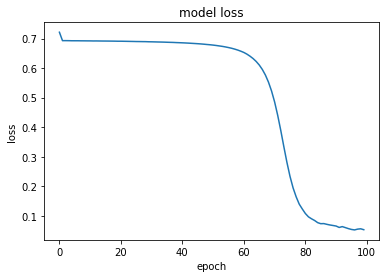

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])

124/124 [==============================] - 0s 1ms/step - loss: 0.0572 - accuracy: 0.9841
loss:  0.05721229687333107
accuracy:  0.9840909242630005


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix 
 [[1943   35]
 [  28 1954]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1978
           1       0.98      0.99      0.98      1982

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



#### 3. Using different weight initialization strategies

Using RandomNormal Initializer


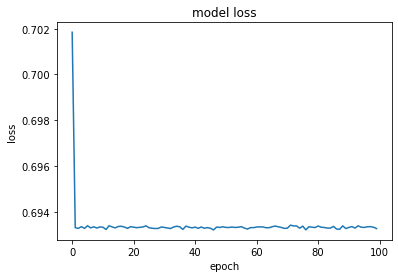

124/124 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5005
loss:  0.6934276223182678
accuracy:  0.5005050301551819
Confusion Matrix 
 [[   0 1978]
 [   0 1982]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1978
           1       0.50      1.00      0.67      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960

Using RandomUniform Initializer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


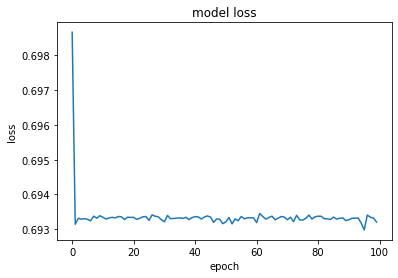

124/124 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5005
loss:  0.6933119297027588
accuracy:  0.5005050301551819
Confusion Matrix 
 [[   0 1978]
 [   0 1982]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1978
           1       0.50      1.00      0.67      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960

Using TruncatedNormal Initializer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


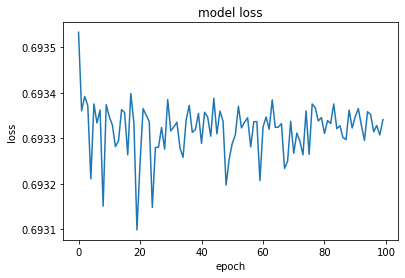

124/124 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5005
loss:  0.6931496262550354
accuracy:  0.5005050301551819
Confusion Matrix 
 [[   0 1978]
 [   0 1982]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1978
           1       0.50      1.00      0.67      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960

Using Zero Initializer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


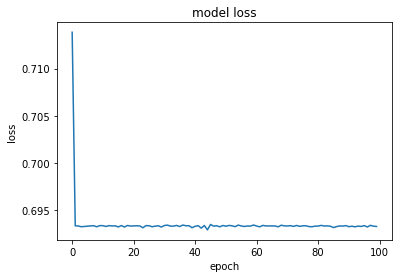

124/124 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4995
loss:  0.6931981444358826
accuracy:  0.4994949400424957
Confusion Matrix 
 [[1978    0]
 [1982    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1978
           1       0.00      0.00      0.00      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960

Using One Initializer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


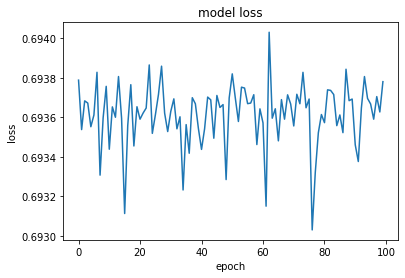

124/124 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4995
loss:  0.6931949853897095
accuracy:  0.4994949400424957
Confusion Matrix 
 [[1978    0]
 [1982    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1978
           1       0.00      0.00      0.00      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960

Using GlorotNormal Initializer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


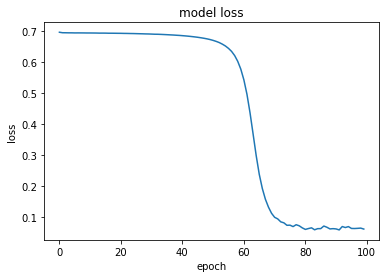

124/124 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.9543
loss:  0.10461001098155975
accuracy:  0.9542929530143738
Confusion Matrix 
 [[1821  157]
 [  24 1958]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1978
           1       0.93      0.99      0.96      1982

    accuracy                           0.95      3960
   macro avg       0.96      0.95      0.95      3960
weighted avg       0.96      0.95      0.95      3960

Using GlorotUniform Initializer


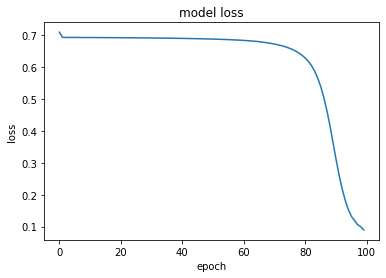

124/124 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9816
loss:  0.08974587917327881
accuracy:  0.9815656542778015
Confusion Matrix 
 [[1955   23]
 [  50 1932]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1978
           1       0.99      0.97      0.98      1982

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960

Using HeNormal Initializer


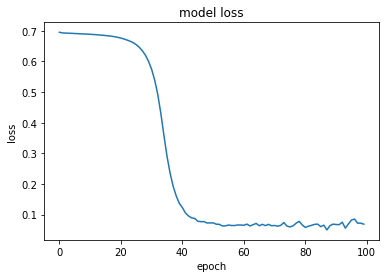

124/124 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9785
loss:  0.07240860164165497
accuracy:  0.9785353541374207
Confusion Matrix 
 [[1967   11]
 [  74 1908]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1978
           1       0.99      0.96      0.98      1982

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960

Using HeUniform Initializer


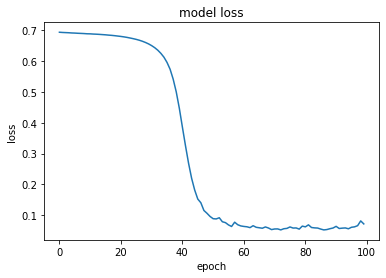

124/124 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9854
loss:  0.057916589081287384
accuracy:  0.9853535294532776
Confusion Matrix 
 [[1964   14]
 [  44 1938]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1978
           1       0.99      0.98      0.99      1982

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960

Using Identity Initializer


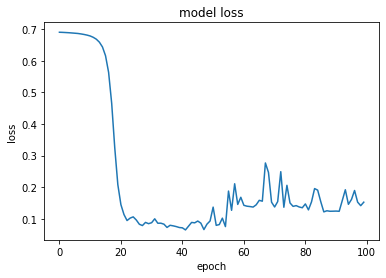

124/124 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9780
loss:  0.09938983619213104
accuracy:  0.9780303239822388
Confusion Matrix 
 [[1969    9]
 [  78 1904]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1978
           1       1.00      0.96      0.98      1982

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960

Using Orthogonal Initializer


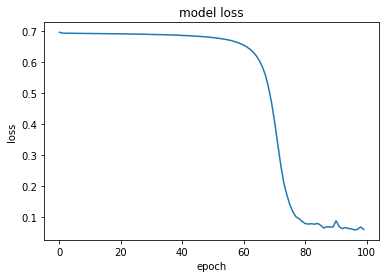

124/124 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9848
loss:  0.0564931184053421
accuracy:  0.9848484992980957
Confusion Matrix 
 [[1952   26]
 [  34 1948]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1978
           1       0.99      0.98      0.98      1982

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report

#Input layers
layer1 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='random_normal',bias_initializer='zeros',activation = 'sigmoid')
layer2 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='random_uniform',bias_initializer='zeros',activation = 'sigmoid')
layer3 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='truncated_normal',bias_initializer='zeros',activation = 'sigmoid')
layer4 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='zero',bias_initializer='zeros',activation = 'sigmoid')
layer5 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='one',bias_initializer='zeros',activation = 'sigmoid')
layer6 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='glorot_normal',bias_initializer='zeros',activation = 'sigmoid')
layer7 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='glorot_uniform',bias_initializer='zeros',activation = 'sigmoid')
layer8 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='he_normal',bias_initializer='zeros',activation = 'sigmoid')
layer9 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'sigmoid')
layer10 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='identity',bias_initializer='zeros',activation = 'sigmoid')
layer11 = layers.Dense(units=30,input_shape = (784,),kernel_initializer='orthogonal',bias_initializer='zeros',activation = 'sigmoid')

# Hidden layers
hidden_layer1 = layers.Dense(units=30,kernel_initializer='random_normal',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer2 = layers.Dense(units=30,kernel_initializer='random_uniform',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer3 = layers.Dense(units=30,kernel_initializer='truncated_normal',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer4 = layers.Dense(units=30,kernel_initializer='zero',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer5 = layers.Dense(units=30,kernel_initializer='one',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer6 = layers.Dense(units=30,kernel_initializer='glorot_normal',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer7 = layers.Dense(units=30,kernel_initializer='glorot_uniform',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer8 = layers.Dense(units=30,kernel_initializer='he_normal',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer9 = layers.Dense(units=30,kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer10 = layers.Dense(units=30,kernel_initializer='identity',bias_initializer='zeros',activation = 'sigmoid')
hidden_layer11 = layers.Dense(units=30,kernel_initializer='orthogonal',bias_initializer='zeros',activation = 'sigmoid')


initializer_set = [("RandomNormal",layer1,hidden_layer1),
                   ("RandomUniform",layer2,hidden_layer2),
                   ("TruncatedNormal",layer3,hidden_layer3),
                   ("Zero",layer4,hidden_layer4),
                   ("One",layer5,hidden_layer5),
                   ("GlorotNormal",layer6,hidden_layer6),
                   ("GlorotUniform",layer7,hidden_layer7),
                   ("HeNormal",layer8,hidden_layer8),
                   ("HeUniform",layer9,hidden_layer9),
                   ("Identity",layer10,hidden_layer10),
                   ("Orthogonal",layer11,hidden_layer11)]



for initializer in initializer_set:
    print("Using",initializer[0],"Initializer")
    model=Sequential()
    model.add(initializer[1])
    model.add(initializer[2])
    model.add(initializer[2])
    model.add(initializer[2])
    model.add(initializer[2])
    model.add(Dense(1, activation = 'sigmoid'))


    sgd = optimizers.SGD(learning_rate = 0.01)
    model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 0)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    results = model.evaluate(X_test, y_test)
    print('loss: ', results[0])
    print('accuracy: ', results[1])
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#### Inference
HeUniform Initializer gave the highest accuracy of 99%. But the HeNormal Initializer was faster in minimizing the cost function (approx. 40 epochs) while Random Uniform initializer took around 50 epochs.

One and Zero Initializer gave an accuracy of 50%. The reason may be due to the Neural network learning all the parameters with the same value and being not able to break the symmetry.

#### 4.Selecting HeUniform initializer and using Relu as the activation function

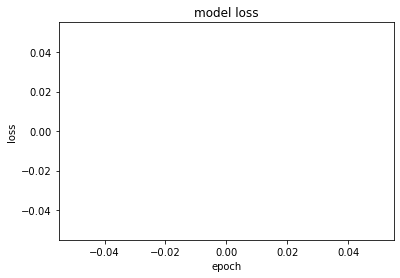

124/124 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4995
loss:  nan
accuracy:  0.4994949400424957
Confusion Matrix 
 [[1978    0]
 [1982    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1978
           1       0.00      0.00      0.00      1982

    accuracy                           0.50      3960
   macro avg       0.25      0.50      0.33      3960
weighted avg       0.25      0.50      0.33      3960



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Relu given as function parameter
layer = layers.Dense(units=30,input_shape = (784,),kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'relu')
hidden_layer = layers.Dense(units=30,kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'relu')

model=Sequential()
model.add(layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(Dense(1, activation = 'sigmoid'))

sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 0)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Inference

Changing to relu activation reduced the accuracy to 50 %. Looks like the model is not trained well with the required weights as it predicts every instance as one class

#### 5.Using adam initializer in question 4

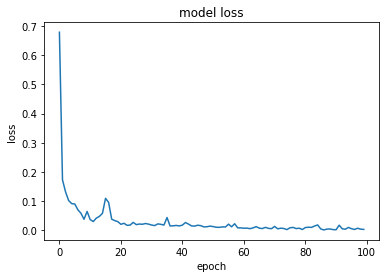

124/124 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9914
loss:  0.05222969874739647
accuracy:  0.9914141297340393
Confusion Matrix 
 [[1956   22]
 [  12 1970]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1978
           1       0.99      0.99      0.99      1982

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [ ]:
# Relu given as function parameter
layer = layers.Dense(units=30,input_shape = (784,),kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'relu')
hidden_layer = layers.Dense(units=30,kernel_initializer='he_uniform',bias_initializer='zeros',activation = 'relu')

model=Sequential()
model.add(layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(hidden_layer)
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 0)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#### Inference

Changing to adam optimizer increased the test accuracy to a great extent (99%). Also the learning got completed in very less number of epochs (approx. 20)